In [10]:
# Importação das bibliottecas utilizadas
import matplotlib.pyplot as plt
from collections import defaultdict
import random 

In [397]:
# Classe que define um grafo, bem como uma busca em profundidade
# que retorna uma lista com os vertices que o dfs percorreu
class Grafo:
    # Construtor
    def __init__(self):
        self.grafo = defaultdict(list)
 
    # Metodo para adicionar uma aresta do verttice u para o v
    # a aresta é adicionada na lista de adjascência de u
    def adiciona_aresta(self, u, v):
        self.grafo[u].append(v)
 
    # Metodo auxiliar usado pelo dfs
    def dfs_recursivo(self, vertice, explorados, caminho):
        # Adiciona o vertice nas listas de explorados e no caminho
        explorados.add(vertice)
        caminho.append(vertice)

        # Realiza a chamada recursive para todos os vertices adjascentes
        # que não tenham sido explorados
        for adjascente in self.grafo[vertice]:
            if adjascente not in explorados:
                self.dfs_recursivo(adjascente, explorados, caminho)
 
    # Metodo que realizará a chamada do dfs para o vertice inicial
    def dfs(self, vertice):
        caminho = []
        # Cria o conjunto de vértices explorados pelo dfs
        explorados = set()
        
        self.dfs_recursivo(vertice, explorados, caminho)
        return caminho

In [396]:
# Função que responde qual a direção a ser tomada partindo de p0p1 até p2
def direction(p0, p1, p2):
  produto_interno = (p1[0] - p0[0])*(p2[1] - p0[1]) - (p2[0] - p0[0])*(p1[1] - p0[1])
  if produto_interno > 0:
    resposta = "esquerda"
  elif produto_interno < 0:
    resposta = "direita"
  else:
    resposta = "colinear"
  return resposta

In [395]:
# Função que verifica se o ponto p está dentro ou coincide com alguma aresta 
# do triângulo abc
def dentro_triangulo(a, b, c, p):
  direcao_ab_p = direction(a, b, p)
  direcao_bc_p = direction(b, c, p)
  direcao_ca_p = direction(c, a, p)
  if (direcao_ab_p == "direita") | (direcao_bc_p == "direita") | (direcao_ca_p == "direita"):
    return False
  else:
    return True 

In [394]:
# Exibe os pontos
def plot_pontos(pontos):
  xs = [coord[0] for coord in pontos]
  ys = [coord[1] for coord in pontos]

  plt.plot(xs,ys, color='black', marker='o', lw=0, markersize=12)
  
  plt.grid(True)
  plt.show()

In [393]:
# Exibe o poligono
def plot_poligono(diagonais, original, cor):
  original.append(original[0])
  
  xs = [coord[0] for coord in original]
  ys = [coord[1] for coord in original]
  
  xs_diag = []
  ys_diag = []
  for i in range(len(diagonais)):
    xs_diag.append([coord[0] for coord in diagonais[i]])
    ys_diag.append([coord[1] for coord in diagonais[i]])
  
  plt.plot(xs,ys, color='black', marker='o', linestyle='solid', linewidth=2, markersize=12)
  
  for i in range(len(diagonais)):
    plt.plot(xs_diag[i],ys_diag[i], color='black', marker='o', linestyle='dashed', linewidth=2, markersize=12)
  
  if cor[(xs[0], ys[0])] != "black":
    for i in range(len(original)):
      plt.plot(xs[i], ys[i], color = cor[(xs[i], ys[i])], marker='o', markersize=12)
  
  plt.grid(True)
  plt.show()

  original.pop(len(original)-1)

In [392]:
# Rotaciona a lista de pontos
def avanca_poligono(pontos):
  pontos.append(pontos[0])
  pontos.pop(0)

In [391]:
# Inicia o polígono com todos vértices pretos
def inicia_cores_vertices(pontos):
  cor = {}
  for i in pontos:
    cor[i] = "black"
  return cor

In [390]:
# Imprime as cores dos vértices do polígono
def imprime_cores_vertices(cor):
  for i in cor:
    print("Vertice", i, ":", cor[i])

In [425]:
# Funcao que realiza e exibe a triangulacao do poligono
def triangulacao(pontos, triangulos, diagonais, cor):
  copia = pontos.copy()
  plot_poligono(diagonais, pontos, cor)
  while len(copia) > 3:
    direcao = direction(copia[-1], copia[0], copia[1])
    ponto_interno = False
    if direcao == "esquerda":
      for i in range(2, len(copia)-1):
        if dentro_triangulo(copia[-1], copia[0], copia[1], copia[i]):
          ponto_interno = True
          break
      if ponto_interno == False:
        triangulos.append([copia[-1], copia[0], copia[1]])
        diagonais.append([copia[-1], copia[1]])
        copia.pop(0)
    avanca_poligono(copia)
    plot_poligono(diagonais, pontos, cor)
  triangulos.append([copia[-1], copia[0], copia[1]])

In [388]:
# Funcao para popular o grafo a partir da triangulacao do poligono
def cria_grafo_dual(grafo_dual, traingulos):
  for i in range(len(triangulos)):
    for j in range(len(triangulos)):
      cont = 0
      if triangulos[i][0] in triangulos[j]:
        cont += 1
      if triangulos[i][1] in triangulos[j]:
        cont += 1
      if triangulos[i][2] in triangulos[j]:
        cont += 1 
      if cont == 2:
        grafo_dual.adiciona_aresta(i, j)

In [387]:
# Funcao que realiza e exibe a coloracao dos pontos do poligono
def tres_coloracao(pontos, diagonais, cor, triangulos, caminho):
  cor[triangulos[caminho[0]][0]] = "red"
  cor[triangulos[caminho[0]][1]] = "blue"
  cor[triangulos[caminho[0]][2]] = "green"
  for i in caminho:
    disponiveis = ["red", "blue", "green"]
    if cor[triangulos[i][0]] in disponiveis:
      disponiveis.remove(cor[triangulos[i][0]])
    if cor[triangulos[i][1]] in disponiveis:
      disponiveis.remove(cor[triangulos[i][1]])
    if cor[triangulos[i][2]] in disponiveis:
      disponiveis.remove(cor[triangulos[i][2]])
    j = 0
    while (len(disponiveis) > 0) & (j < 3):
      if cor[triangulos[i][j]] == "black":
        cor[triangulos[i][j]] = disponiveis[0]
        disponiveis.pop(0)
      j += 1
    plot_poligono(diagonais, pontos, cor)

In [421]:
# Escolha dos casos de teste
def casos_teste(entrada):
  pontos = []
  if entrada == 1:
    pontos = [(0, 0), (12, 0), (11.0, 10), (10.5, 2), (10.0, 2), (9.5, 10),
              (9.0, 2), (8.5, 2), (8.0, 10), (7.5, 2), (7.0, 2), (6.5, 10),
              (6.0, 2), (5.5, 2), (5.0, 10), (4.5, 2), (4.0, 2), (3.5, 10),
              (3.0, 2), (2.5, 2), (2.0, 10), (1.5, 2), (1.0, 2), (0.5, 10)]
  if entrada == 2:
    pontos = [(0,0), (1,3), (4,-2),(6.5,4),(2,4.5),(7.5,7),(1.5,7.5),(0.6,5),
              (-0.8,6)]
  if entrada == 3:
    pontos = [(0.7071067811865476, 0.7071067811865475), (6.123233995736766e-17, 1.0),
              (-0.7071067811865475, 0.7071067811865476), (-1.0, 1.2246467991473532e-16),
              (-0.7071067811865477, -0.7071067811865475), (-1.8369701987210297e-16, -1.0),
              (0.7071067811865475, -0.7071067811865477), (1.0, -2.4492935982947064e-16)]
  if entrada == 4:
    pontos = [(3,4), (2,2), (3.5025,1.02125), (3.8025,2.64125), (4.7825,1.22125), 
              (6.2225,1.20125), (6.5225,2.42125), (5.6025,3.58125), (5.0625,2.52125), 
              (4.3425,3.48125), (5.3825,4.68125)]
  return pontos

Digite qual caso de teste deseja executar(1 a 4):4
Polígono fornecido na entrada


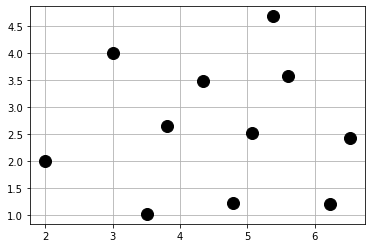

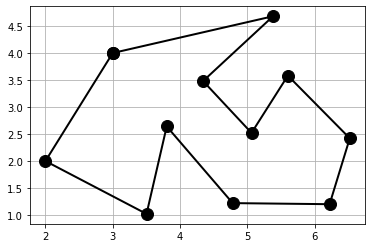

In [439]:
# Entrada dos pontos do poligono
falha = True
while falha:
  entrada = int(input("Digite qual caso de teste deseja executar(1 a 4):"))
  if (entrada != 1)  & (entrada != 2)  &(entrada != 3)  &(entrada != 4):
    falha = True
  else:
    falha = False
pontos = casos_teste(entrada)

# Inicializa as variaveis auxiliares do algoritmo
cor = inicia_cores_vertices(pontos)
diagonais = []
triangulos = []

print("Polígono fornecido na entrada")
plot_pontos(pontos)
plot_poligono(diagonais, pontos, cor)

Triangulação do polígono passo a passo


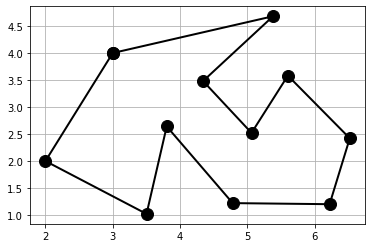

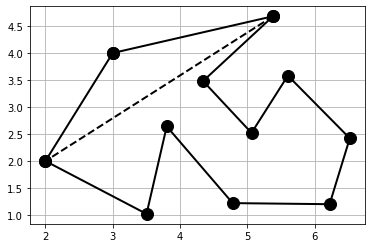

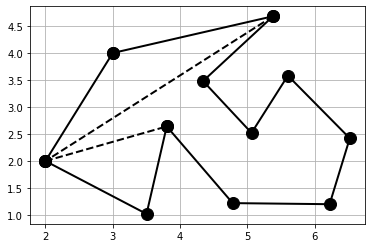

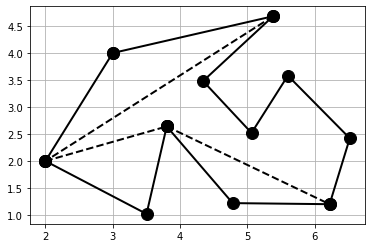

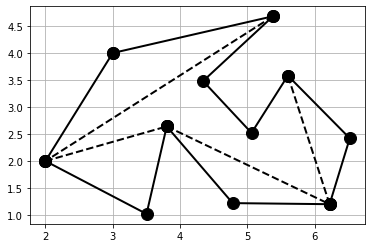

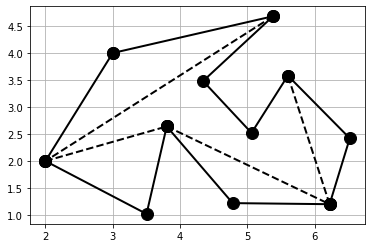

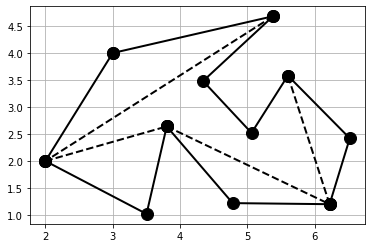

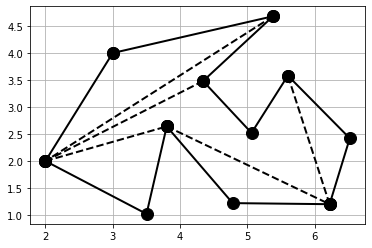

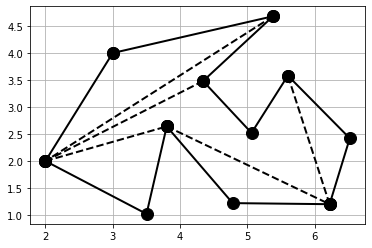

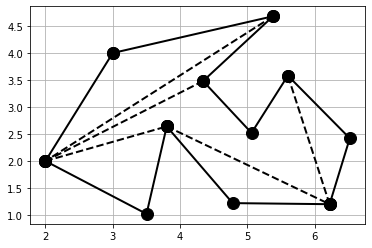

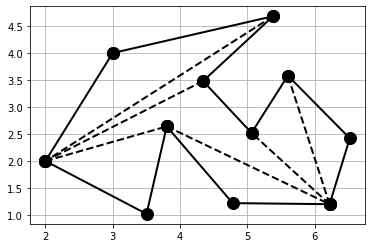

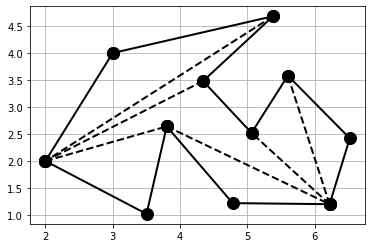

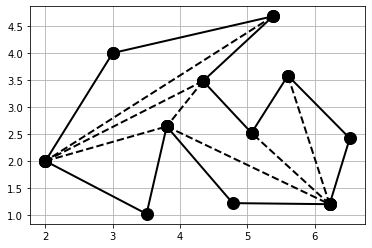

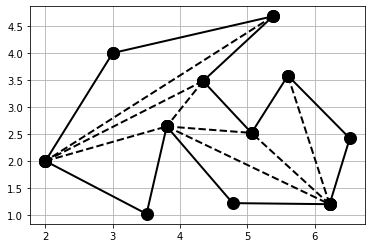

In [440]:
print("Triangulação do polígono passo a passo")
triangulacao(pontos, triangulos, diagonais, cor)

Coloração dos vértices polígono passo a passo


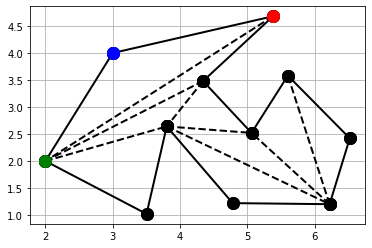

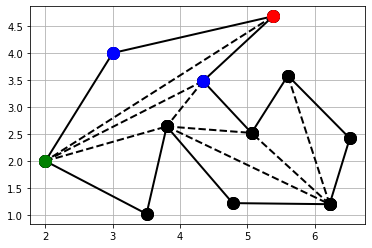

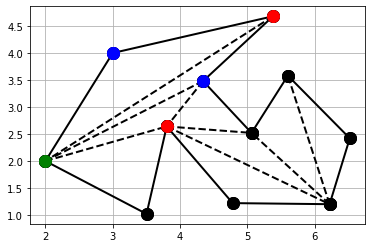

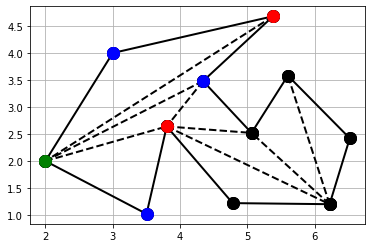

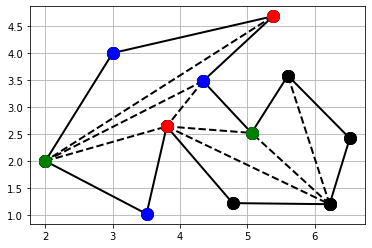

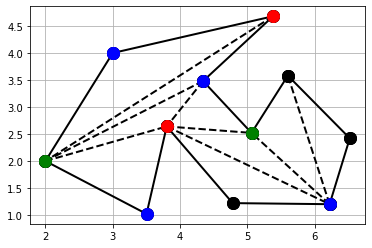

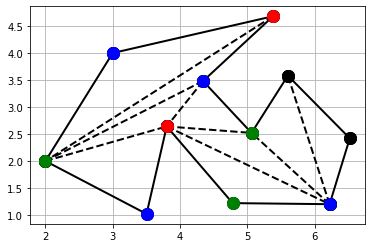

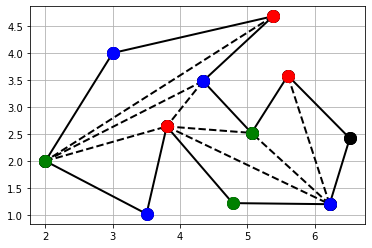

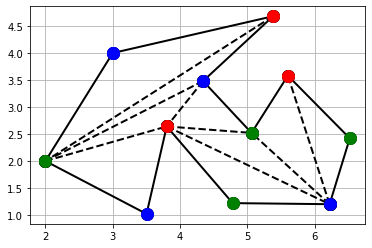

In [441]:
# Cria o gráfico dual do poligono para ser utilizado pela coloracao
grafo_dual = Grafo()
cria_grafo_dual(grafo_dual, triangulos)
caminho = grafo_dual.dfs(0)

print("Coloração dos vértices polígono passo a passo")
tres_coloracao(pontos, diagonais, cor, triangulos, caminho)

Final do algoritmo


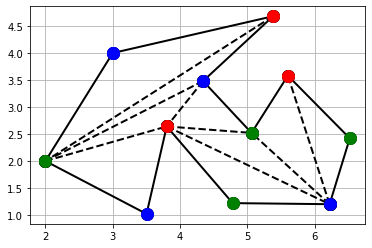

In [442]:
print("Final do algoritmo")
plot_poligono(diagonais, pontos, cor)